In [2]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from utils.processing import (
    open_preprocessed_data )

In [3]:
DIR = 'preprocessed_dataset'
dfs_names = ['tr11', 'tr12', 'tr2','tr3','tr4','tr5','tr6','tr7', 'tr91','tr92']

# 1. Load datasets
dfs_dict = {}  # <------- now we use this dict 
for n in dfs_names:
    fname = os.path.join(DIR, f'{n}.pkl')
    subtraj_list = open_preprocessed_data(fname)
    dfs_dict[n] = subtraj_list

### Sort trajectories samples to near-wall / near-middle area

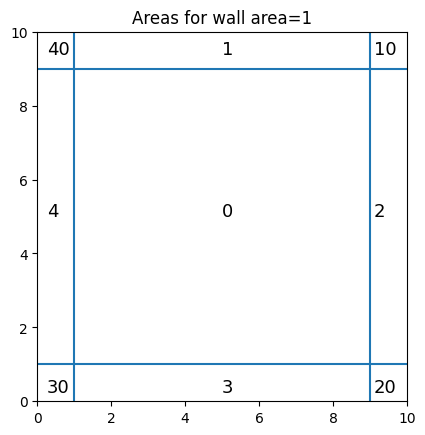

In [8]:
# demarkation of areas, made by hands :)
wall_percent = 1 # == 10%
square_len = 10

plt.axvline(wall_percent)
plt.axvline(square_len - wall_percent)
plt.axhline(wall_percent)
plt.axhline(square_len - wall_percent)

plt.text(wall_percent/4, wall_percent/4, '30', fontsize=13)
plt.text(square_len/2, wall_percent/4, '3', fontsize=13)
plt.text(square_len-0.9, wall_percent/4, '20', fontsize=13)

plt.text(wall_percent/4, square_len/2, '4', fontsize=13)
plt.text(square_len/2, square_len/2, '0', fontsize=13)
plt.text(square_len-0.9, square_len/2, '2', fontsize=13)

plt.text(wall_percent/4, square_len-0.6, '40', fontsize=13)
plt.text(square_len/2, square_len-0.6, '1', fontsize=13)
plt.text(square_len-0.9, square_len-0.6, '10', fontsize=13)

plt.xlim([0, square_len])
plt.ylim([0, square_len])
plt.title(f'Areas for wall area={wall_percent}')
plt.gca().set_aspect('equal')
plt.show()

In [31]:
borders = {}

for k, df_list in dfs_dict.items():
    merged_df = pd.concat(df_list)
    borders[k] = {
        'xmin': merged_df['x'].min(),
        'xmax': merged_df['x'].max(),
        'ymin': merged_df['y'].min(),
        'ymax': merged_df['y'].max(),
    }   

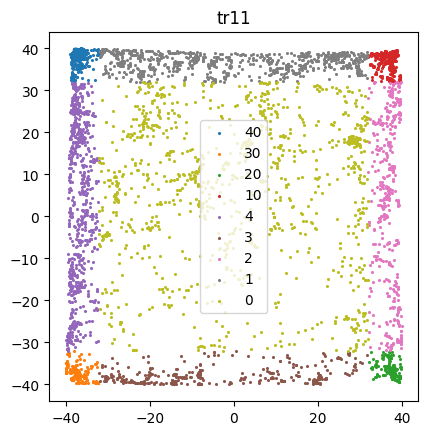

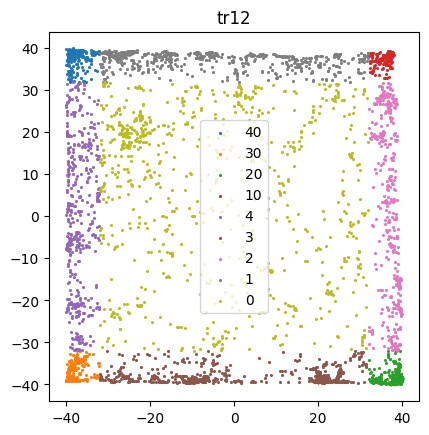

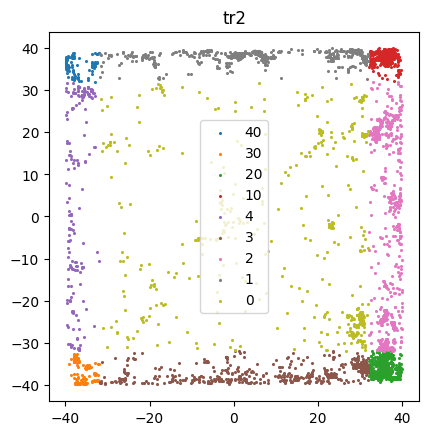

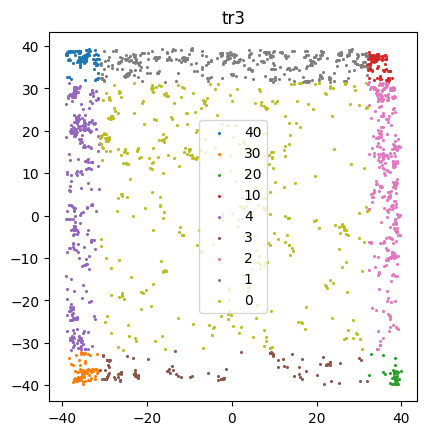

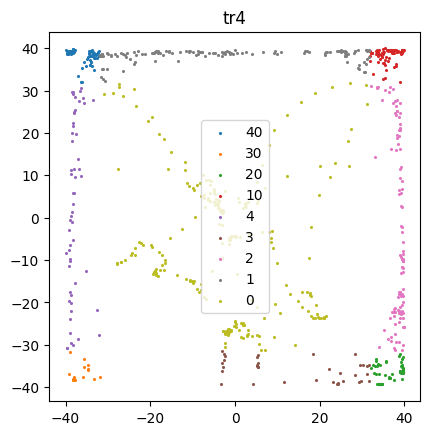

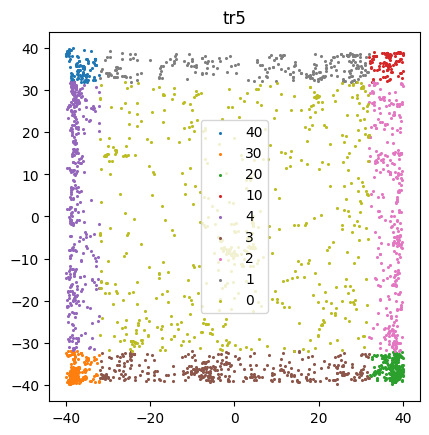

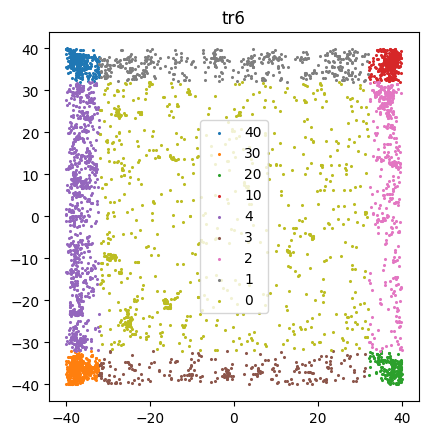

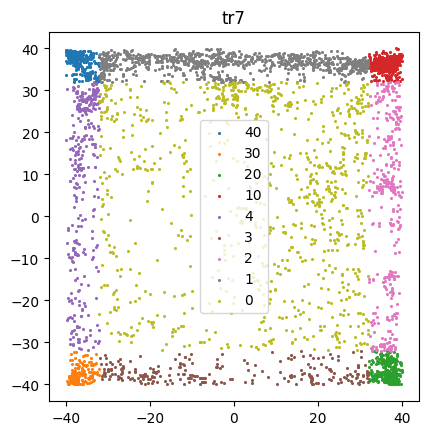

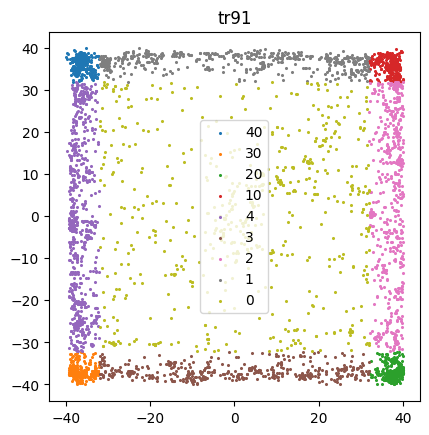

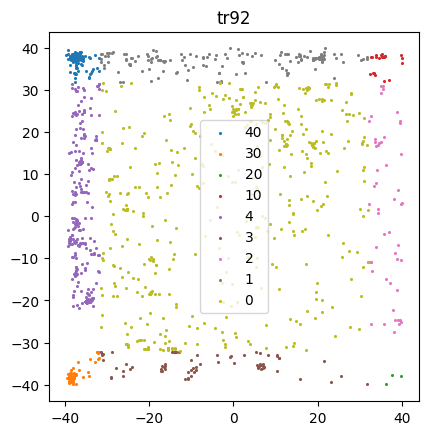

In [32]:
from utils.plotting import plot_wall_sorted_samples
from utils.processing import sort_walls_area

dfs_with_walls = {}
borders = {
    'xmin': -40,
    'xmax': 40,
    'ymin': -40,
    'ymax': 40,
}   
for k, df_list in dfs_dict.items():
    df = pd.concat(df_list)
    dfs_with_walls[k] = sort_walls_area(df, borders)  # [k]
    plot_wall_sorted_samples(dfs_with_walls[k], k)

### Check the step length in different areas

#### Calculate mean len of steps

In [33]:
step_stat = []
for k, df in dfs_with_walls.items():
    co = df.loc[df['near_wall']>=10]['step_length'].mean()
    w = df.loc[(df['near_wall']>=1) & (df['near_wall']<=4)]['step_length'].mean()
    ce = df.loc[(df['near_wall']==0) & (df['near_wall']==0)]['step_length'].mean()
    step_stat.append([co, ce, w])

for i, df_idx in enumerate(step_stat):
    print(f'For data {dfs_names[i]}: cornMean={round(df_idx[0], 3)}, wallMean={round(df_idx[1], 3)}, centMean={round(df_idx[2], 3)}')

For data tr11: cornMean=0.469, wallMean=2.088, centMean=1.573
For data tr12: cornMean=0.476, wallMean=3.005, centMean=1.75
For data tr2: cornMean=0.465, wallMean=1.957, centMean=1.18
For data tr3: cornMean=0.948, wallMean=3.693, centMean=2.206
For data tr4: cornMean=1.038, wallMean=2.084, centMean=3.234
For data tr5: cornMean=1.341, wallMean=5.199, centMean=4.758
For data tr6: cornMean=1.201, wallMean=3.922, centMean=2.785
For data tr7: cornMean=1.081, wallMean=4.609, centMean=2.71
For data tr91: cornMean=1.179, wallMean=4.791, centMean=2.676
For data tr92: cornMean=0.881, wallMean=5.321, centMean=0.655


In [34]:
df = dfs_with_walls['tr11']
print(df.loc[df['near_wall']>=10]['step_length'].mean())
print(df.loc[df['near_wall']>=10]['step_length'].median())

0.46913772931353914
0.16000902249435303


####  Проверим зависимость изменения угла от угла (в разных зонах)

In [35]:
dfs_with_step_lens = dfs_with_walls

In [36]:
DfsStep13, DfsStep24 = {}, {}
for k, df in dfs_with_step_lens.items():
    DfsStep13[k] = df.loc[(df['near_wall']==1) | (df['near_wall']==3)]
    DfsStep13[k] = DfsStep13[k].reset_index()
    DfsStep13[k] = DfsStep13[k].drop(['index'], axis=1) 

    DfsStep24[k] = df.loc[(df['near_wall']==2) | (df['near_wall']==4)]
    DfsStep24[k] = DfsStep24[k].reset_index()
    DfsStep24[k] = DfsStep24[k].drop(['index'], axis=1)

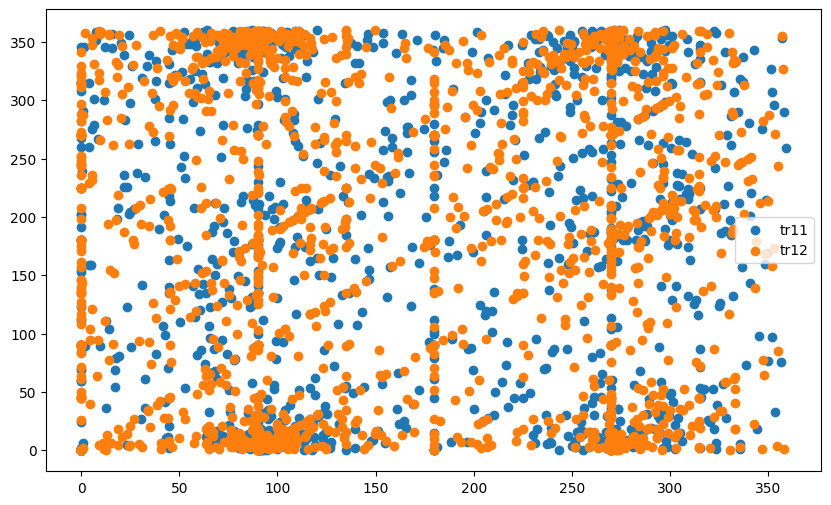

In [37]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
for i in DfsStep13:
    plt.scatter(DfsStep13[i]['angles'], DfsStep13[i]['delta_angle'], label=i)
    if i =='tr12':  # TMP
        break
plt.legend()
plt.show()

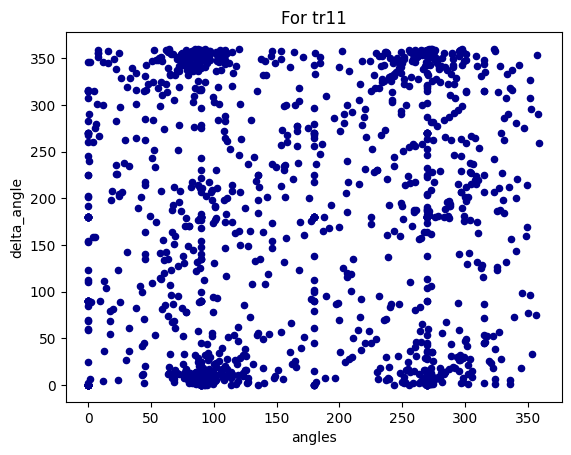

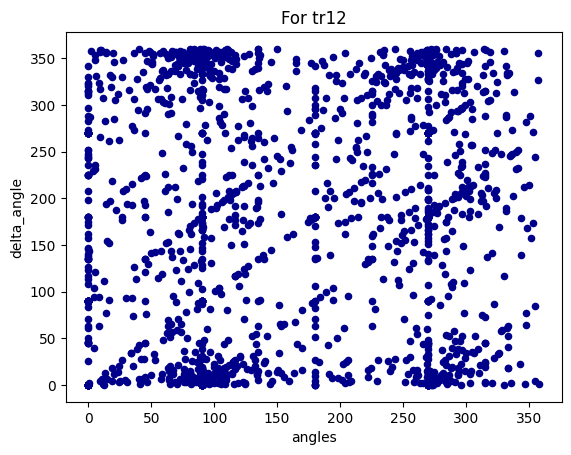

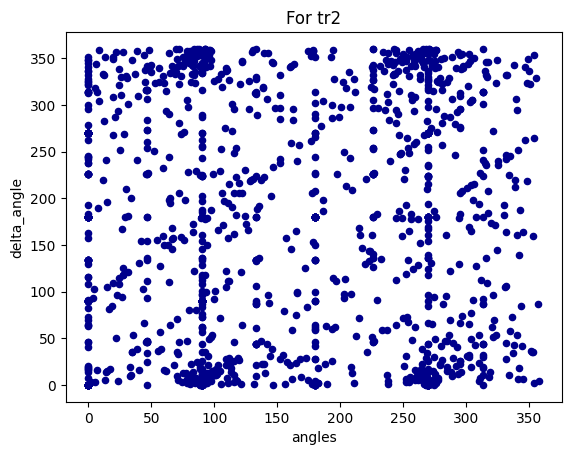

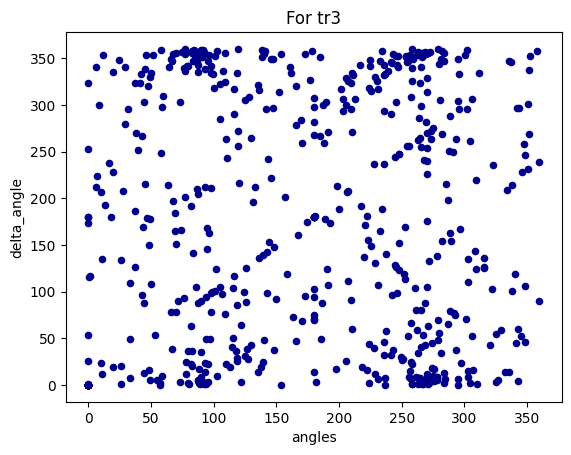

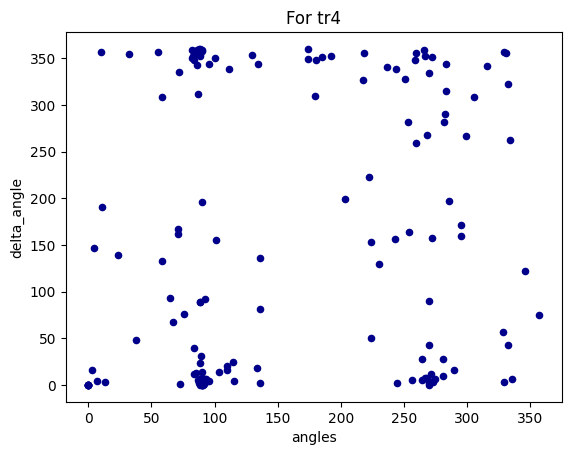

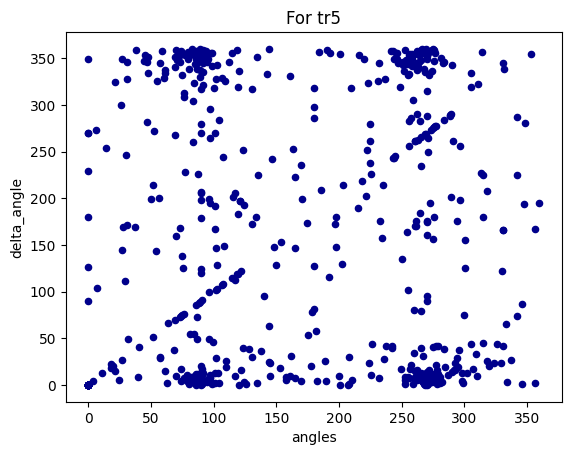

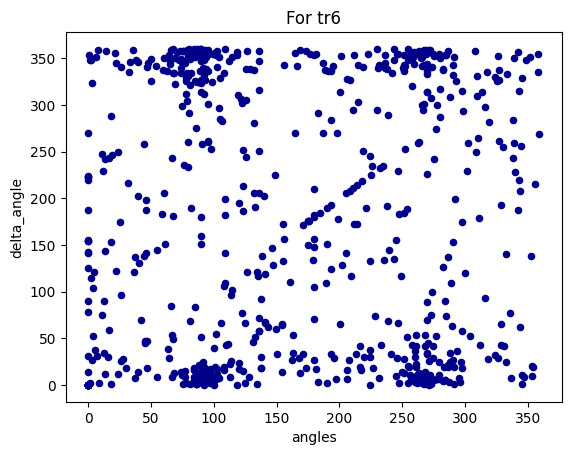

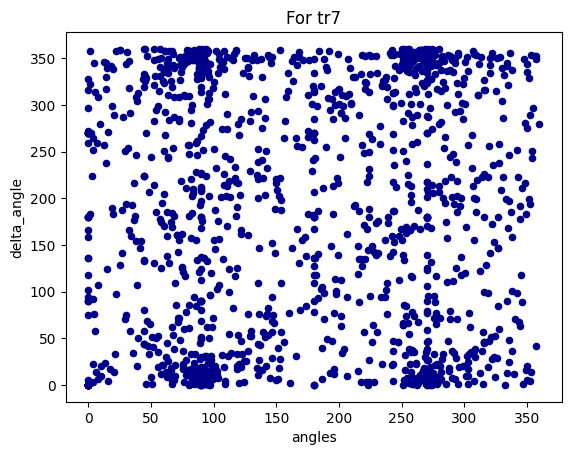

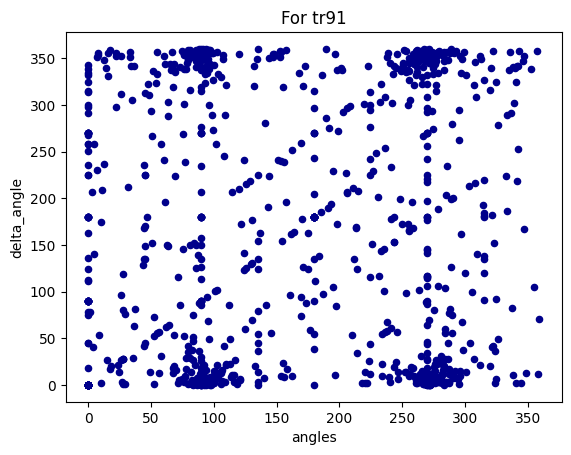

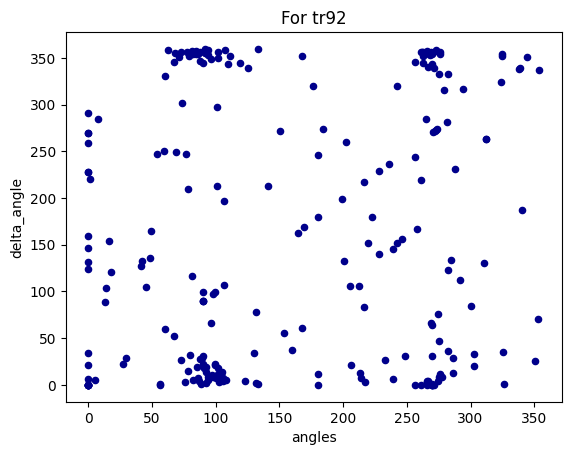

In [40]:
for i in DfsStep13:
    DfsStep13[i].plot.scatter(x='angles',y='delta_angle', c='DarkBlue')
    plt.title(f'For {i}')
    plt.show()

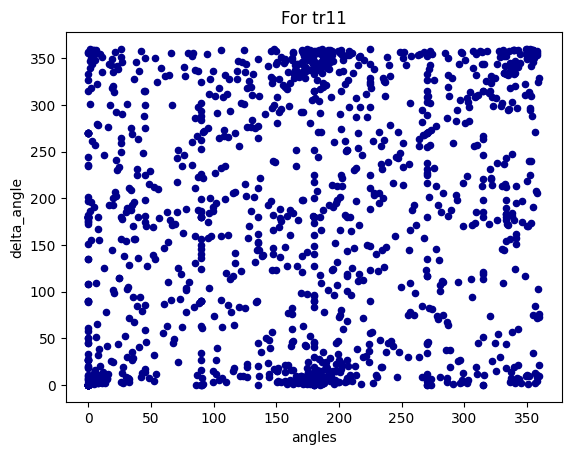

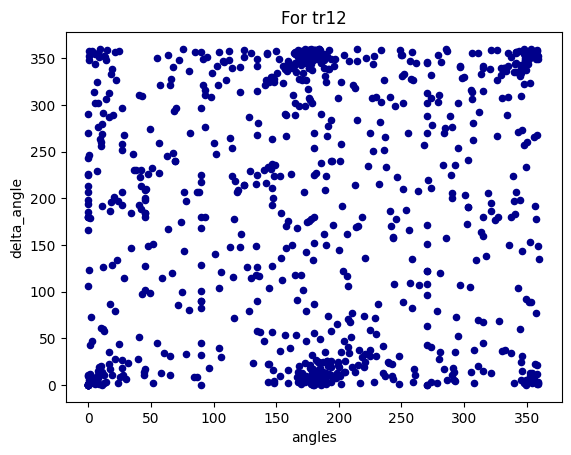

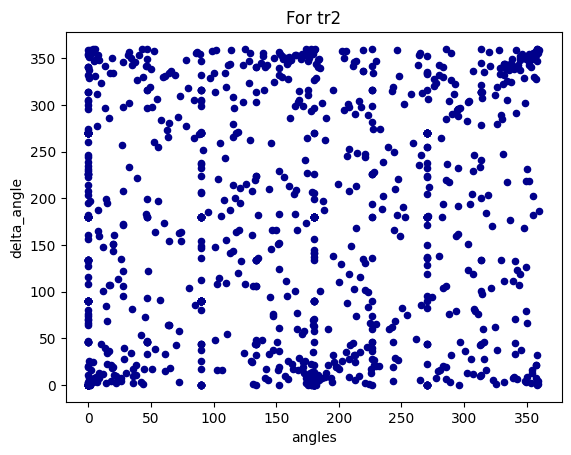

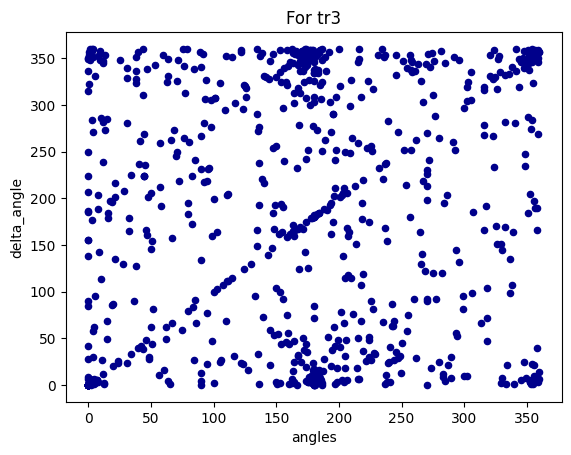

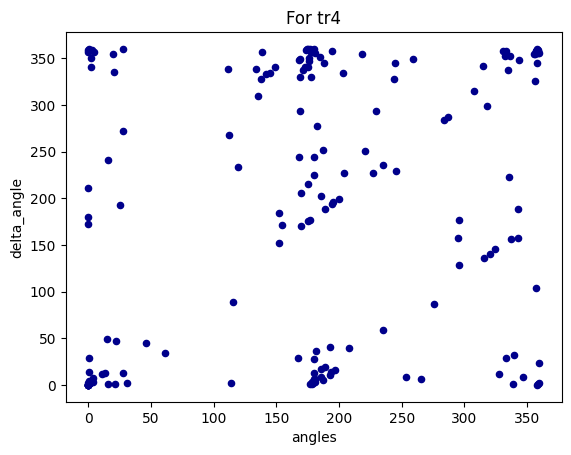

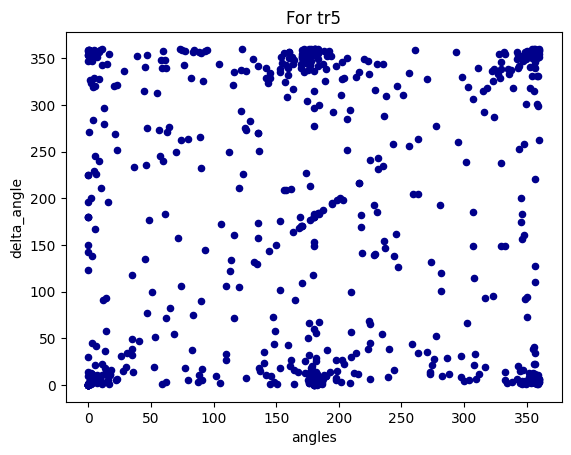

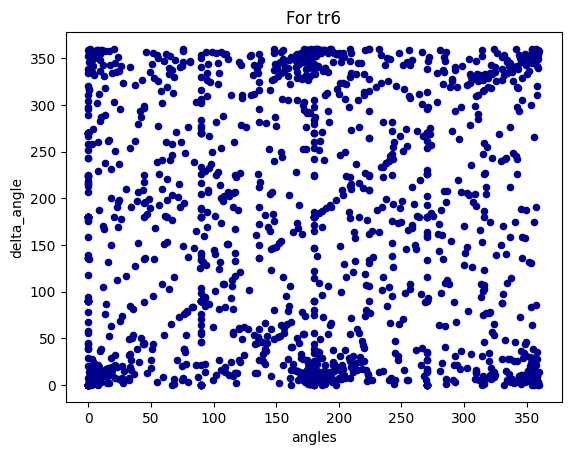

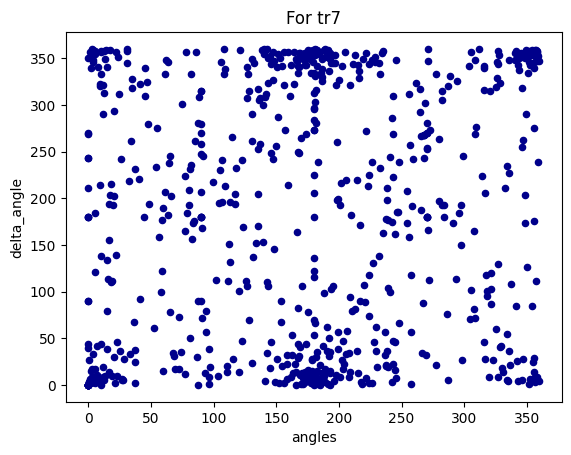

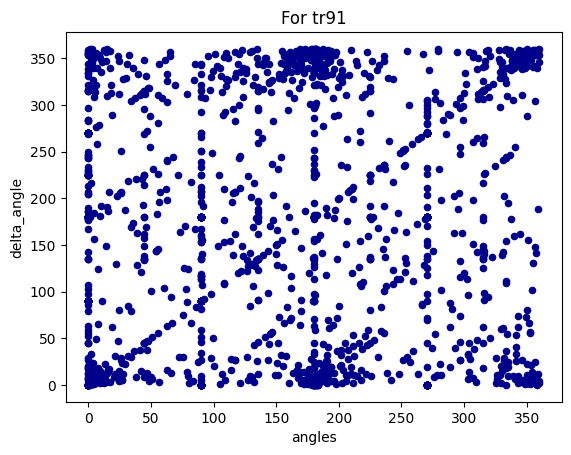

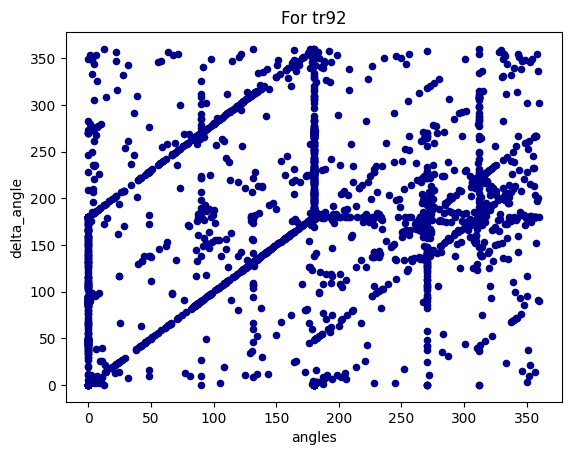

In [41]:
for i in DfsStep24:
    DfsStep24[i].plot.scatter(x='angles',y='delta_angle', c='DarkBlue')
    plt.title(f'For {i}')
    plt.show()

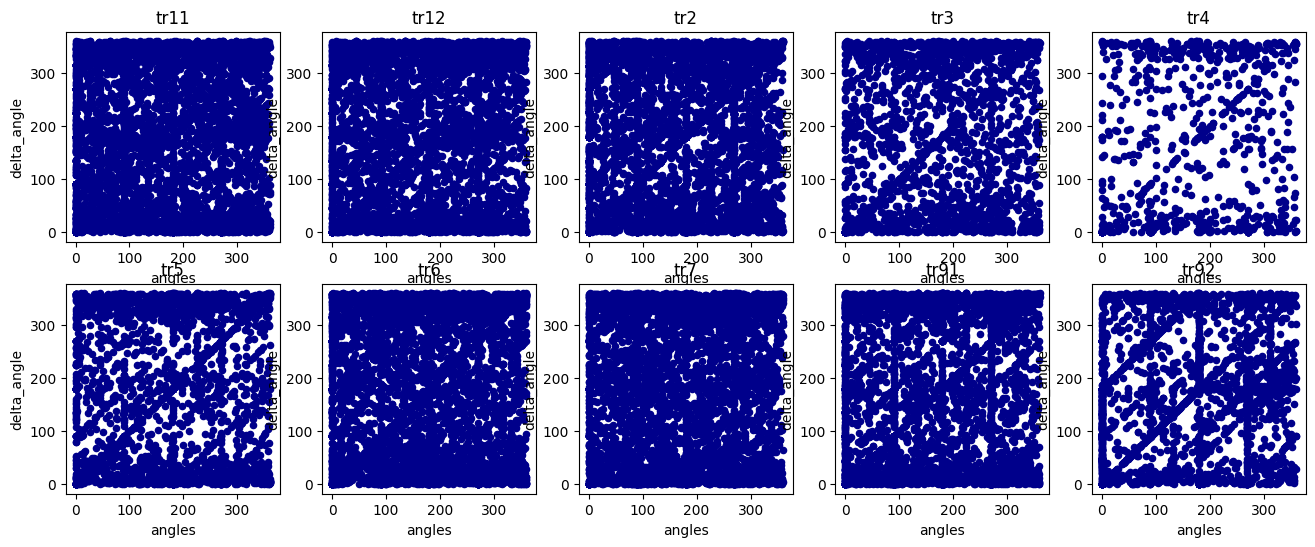

In [42]:
# In 9 all areas
fig, axes = plt.subplots(2, 5, figsize=(16, 6))
j, i = 0, 0
for k in dfs_with_step_lens:
    dfs_with_step_lens[k].plot.scatter(x='angles',y='delta_angle', c='DarkBlue', ax=axes[j, i])
    axes[j, i].set_title(k)
    i += 1
    if i == 5:
        j = 1
        i = 0
plt.show()

### Look how angles / delta angles are for 1,2,3,4 walls

In [43]:
dfs_walls = {}
walls = [1, 2, 3, 4]

for w in walls:
    df_steps_for_wall = {}

    for i in dfs_with_step_lens:
        df = dfs_with_step_lens[i]
        df_steps_for_wall[i] = df.loc[df['near_wall']==w]
        df_steps_for_wall[i] = df_steps_for_wall[i].reset_index()
        df_steps_for_wall[i] = df_steps_for_wall[i].drop(['index'], axis=1)

    dfs_walls[w] = df_steps_for_wall

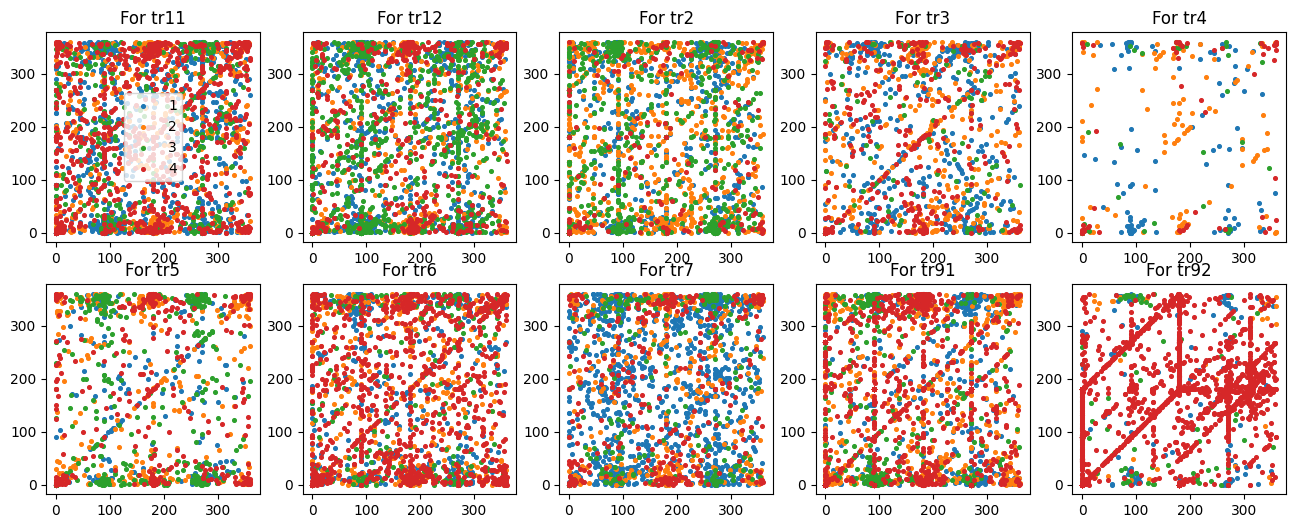

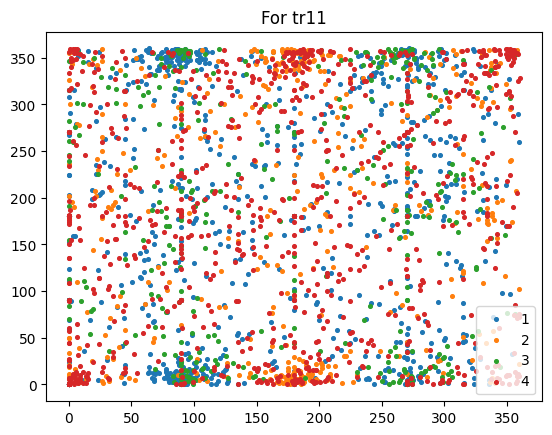

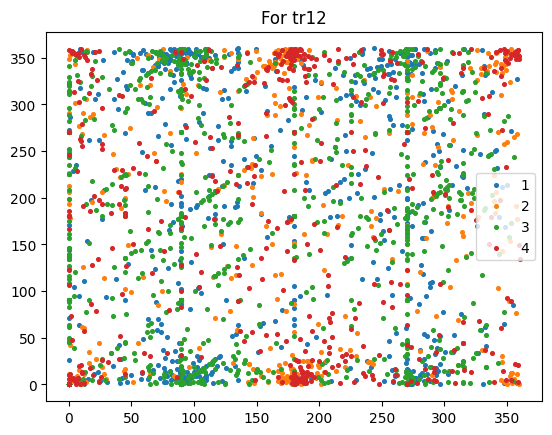

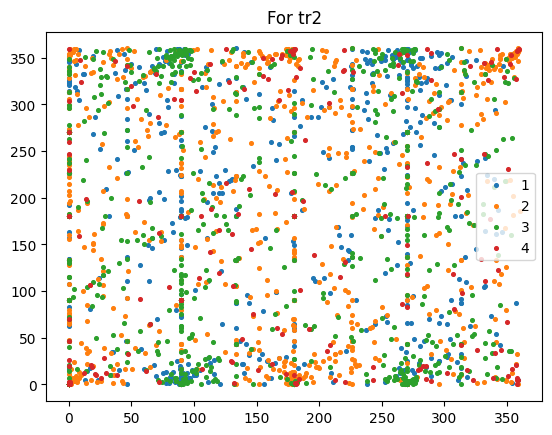

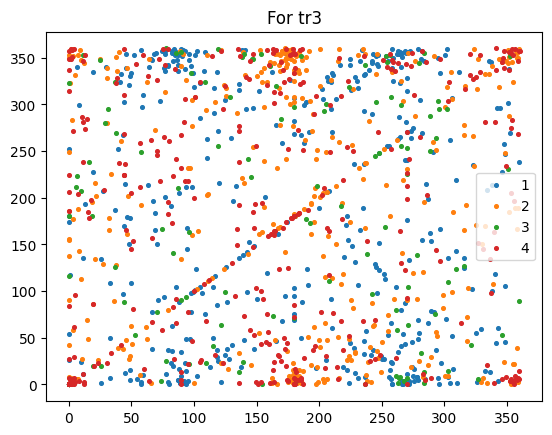

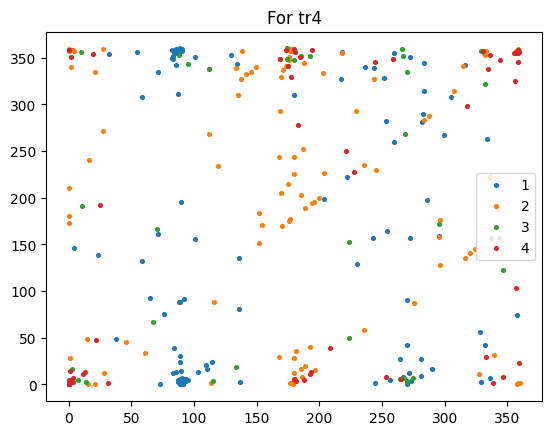

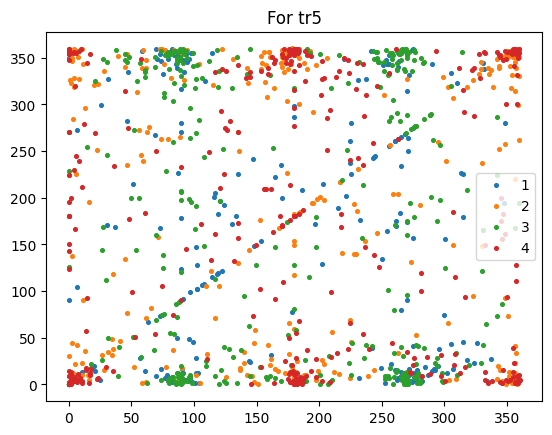

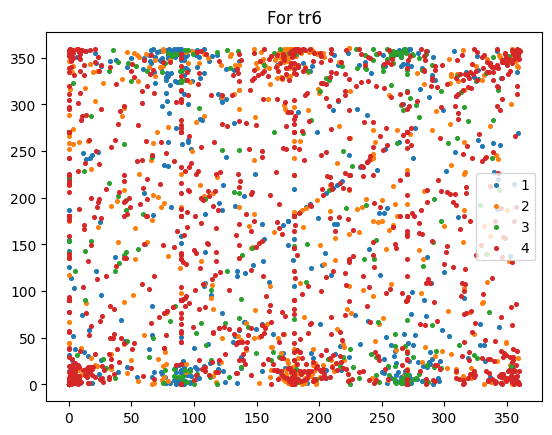

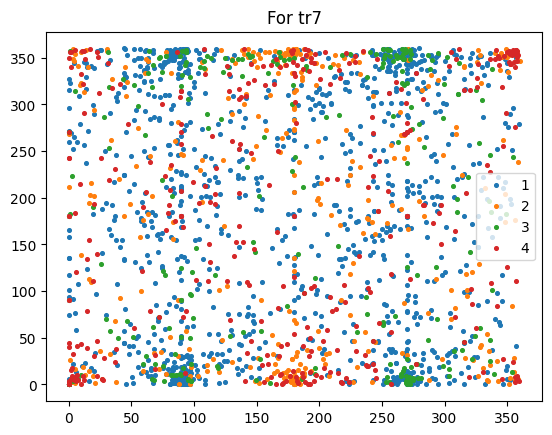

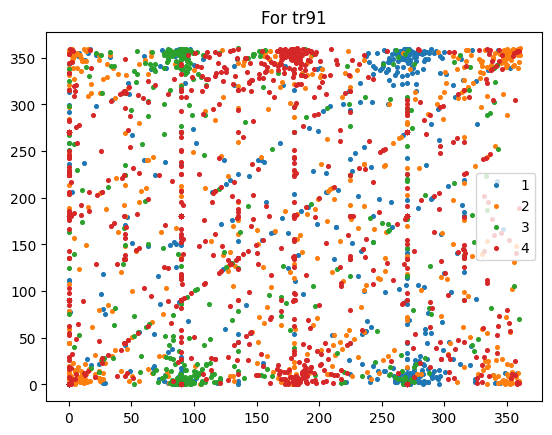

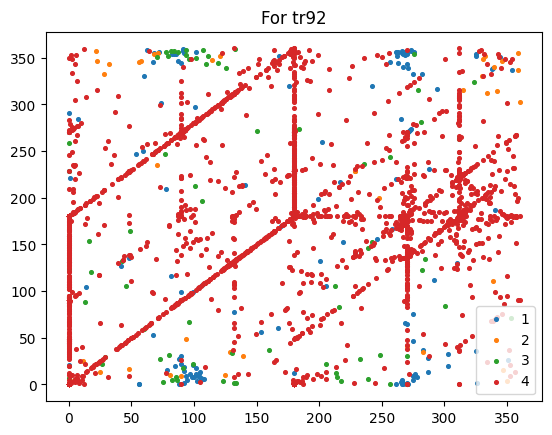

In [44]:
fig, axes = plt.subplots(2, 5, figsize=(16, 6))
j, i = 0, 0
for k, df in dfs_with_step_lens.items():
    for w in walls:
        dfw = dfs_walls[w][k]
        axes[j, i].scatter(dfw['angles'], dfw['delta_angle'], s=7, label=w)
    axes[j, i].set_title(f'For {k}')
    i += 1
    if i == 5:
        j = 1
        i = 0
axes[0, 0].legend()
plt.show()

## OR one-by-one
for k, df in dfs_with_step_lens.items():
    for w in walls:
        dfw = dfs_walls[w][k]
        plt.scatter(dfw['angles'], dfw['delta_angle'], s=7, label=w)
    plt.title(f'For {k}')
    plt.legend()
    plt.show()
    # break

### Look how angles / delta angles are for 10,20,30,40 walls

In [45]:
dfs_walls = {}
walls = [10, 20, 30, 40]

for w in walls:
    df_steps_for_wall = {}

    for i in dfs_with_step_lens:
        df = dfs_with_step_lens[i]
        df_steps_for_wall[i] = df.loc[df['near_wall']==w]
        df_steps_for_wall[i] = df_steps_for_wall[i].reset_index()
        df_steps_for_wall[i] = df_steps_for_wall[i].drop(['index'], axis=1)

    dfs_walls[w] = df_steps_for_wall

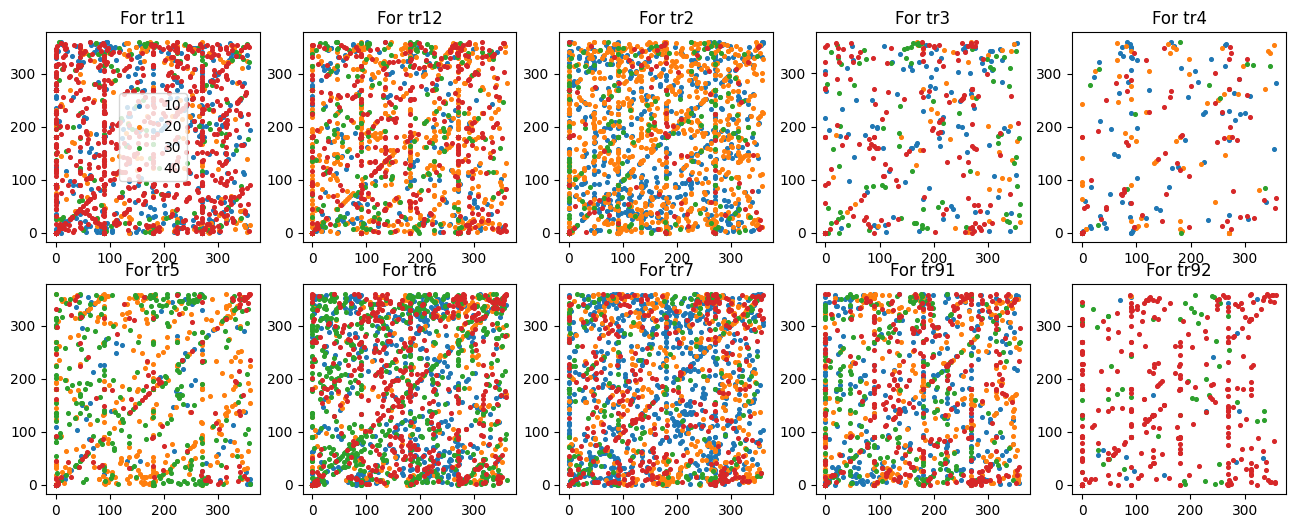

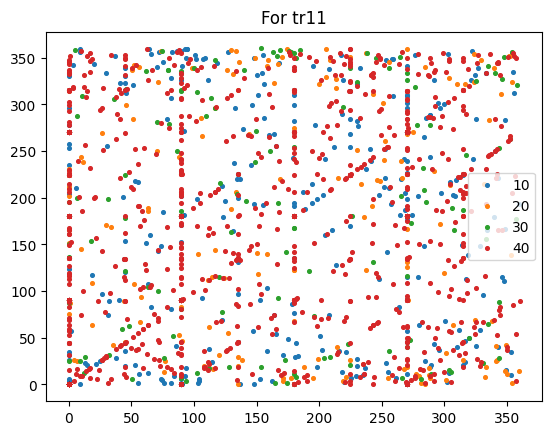

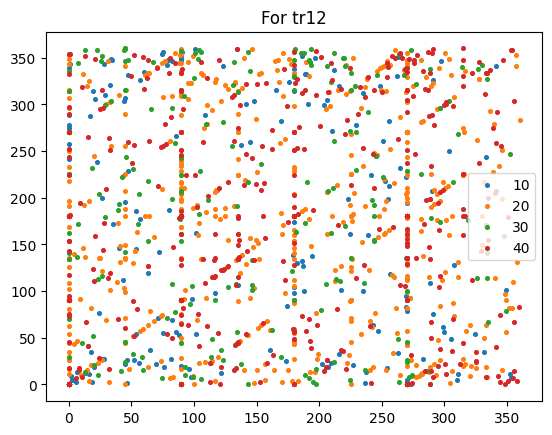

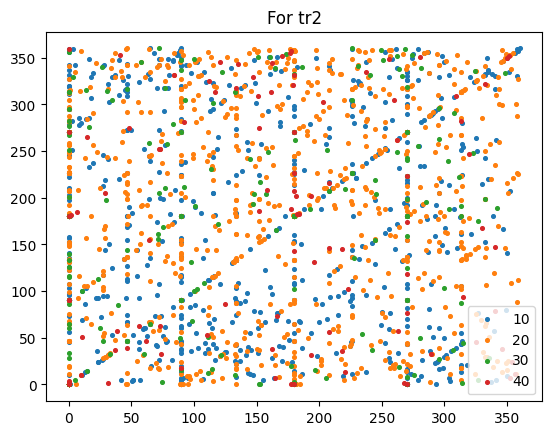

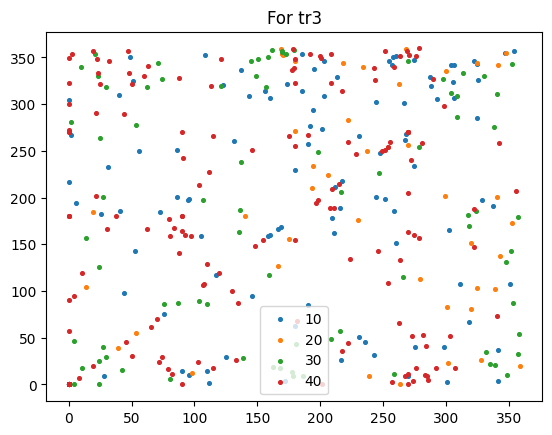

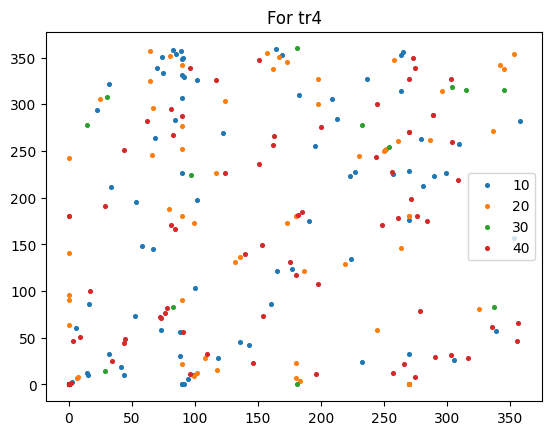

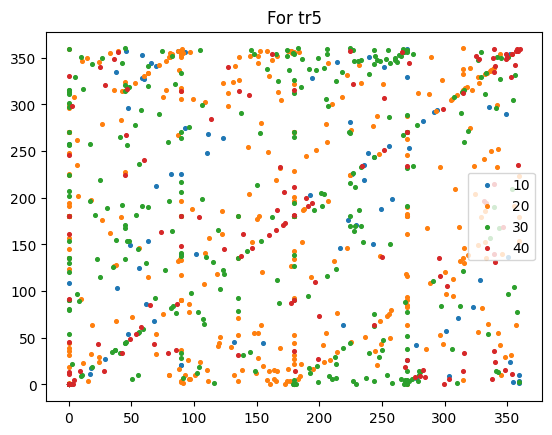

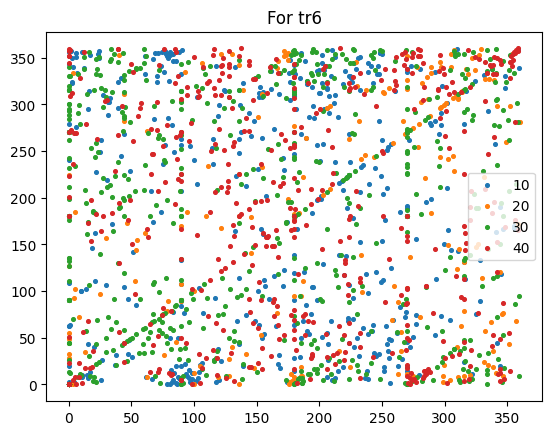

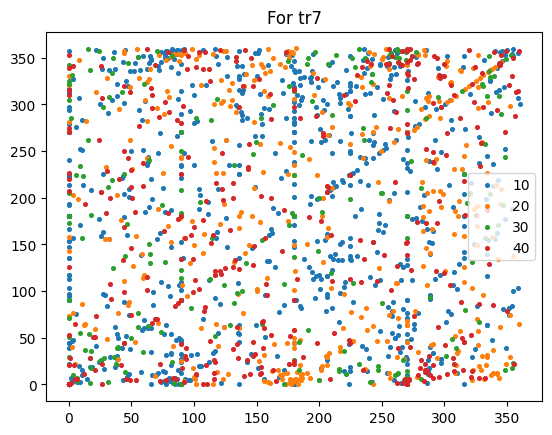

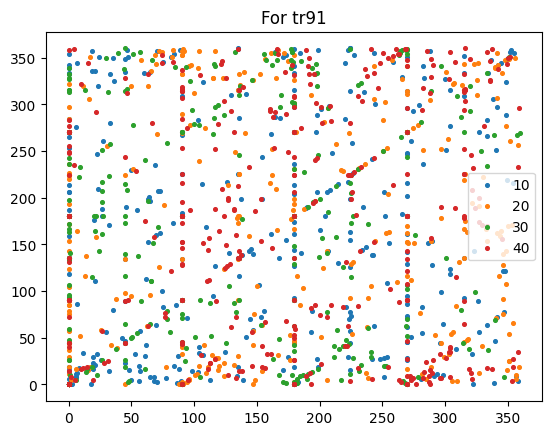

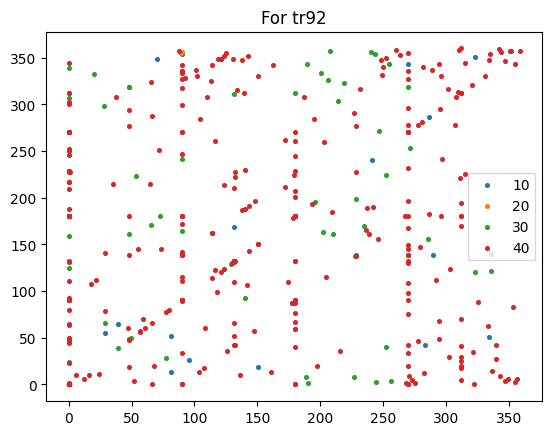

In [46]:
fig, axes = plt.subplots(2, 5, figsize=(16, 6))
j, i = 0, 0
for k, df in dfs_with_step_lens.items():
    for w in walls:
        dfw = dfs_walls[w][k]
        axes[j, i].scatter(dfw['angles'], dfw['delta_angle'], s=7, label=w)
    axes[j, i].set_title(f'For {k}')
    i += 1
    if i == 5:
        j = 1
        i = 0
axes[0, 0].legend()
plt.show()

## OR one-by-one
for k, df in dfs_with_step_lens.items():
    for w in walls:
        dfw = dfs_walls[w][k]
        plt.scatter(dfw['angles'], dfw['delta_angle'], s=7, label=w)
    plt.title(f'For {k}')
    plt.legend()
    plt.show()
    # break

### посчитаем сколько значений в 1,3 и 2,4 зонах, в которых угол в окрестностях таргетных углов (параллельных стене) и остальных углов (не параллельных стене)

In [47]:
#в скольких точек угол мыши параллелен стене +- 25 градусов
# for 1, 3: [90 +- 25], [270 +- 25]; [65, 115], [245, 295]
# for 2, 4: [0 +- 25], [180 +- 25] ; [335 , 25], [155, 205]

for k, df in DfsStep13.items():
    mask = ((df['angles']>=65) & (df['angles']<=115)) \
                               | ((df['angles']>=245) & (df['angles']<=295))
    parallel_df = df.loc[mask]
    not_parallel_df = df[~mask]

    print(f'For {k}: Total len={len(df)}, parallel={len(parallel_df)}, not_parallel={len(not_parallel_df)}')

print('\n')

for k, df in DfsStep24.items():
    mask = ((df['angles']>=335) | (df['angles']<=25)) \
                               | ((df['angles']>=155) & (df['angles']<=205))
    parallel_df = df.loc[mask]
    not_parallel_df = df[~mask]

    print(f'For {k}: Total len={len(df)}, parallel={len(parallel_df)}, not_parallel={len(not_parallel_df)}')
    # break

parallel_df

For tr11: Total len=1294, parallel=665, not_parallel=629
For tr12: Total len=1767, parallel=845, not_parallel=922
For tr2: Total len=1517, parallel=637, not_parallel=880
For tr3: Total len=574, parallel=242, not_parallel=332
For tr4: Total len=167, parallel=108, not_parallel=59
For tr5: Total len=611, parallel=359, not_parallel=252
For tr6: Total len=737, parallel=370, not_parallel=367
For tr7: Total len=1458, parallel=749, not_parallel=709
For tr91: Total len=1038, parallel=574, not_parallel=464
For tr92: Total len=244, parallel=141, not_parallel=103


For tr11: Total len=1320, parallel=619, not_parallel=701
For tr12: Total len=896, parallel=478, not_parallel=418
For tr2: Total len=1222, parallel=602, not_parallel=620
For tr3: Total len=764, parallel=391, not_parallel=373
For tr4: Total len=177, parallel=124, not_parallel=53
For tr5: Total len=704, parallel=457, not_parallel=247
For tr6: Total len=1633, parallel=807, not_parallel=826
For tr7: Total len=749, parallel=382, not_parallel=

time          x          y      angles  delta_angle  step_length  \
0        1.0010  33.864841  -7.341999    0.000000     0.000000     0.000000   
1        1.3025  34.366383   0.825183    3.514089     3.514089     8.182568   
2        1.6040  34.095774  10.915404  358.463757   354.949668    10.093849   
5       23.7585  39.509303  22.684690  360.000000   302.288541     0.656963   
6       24.0600  38.751169  24.754023  339.878855   339.878855     2.203839   
...         ...        ...        ...         ...          ...          ...   
3680  1677.5915 -34.847202 -20.273807  180.000000   267.703157     0.092782   
3681  1677.8930 -34.847202 -20.273807    0.000000   180.000000     0.000000   
3682  1678.1945 -34.847202 -20.157830    0.000000     0.000000     0.115977   
3683  1678.4960 -34.847202 -20.273807  180.000000   180.000000     0.115977   
3684  1678.7975 -34.847202 -20.137948    0.000000   180.000000     0.135859   

      near_wall  
0           2.0  
1           2.0  
2           2.0  
5           2.0  
6           2.0  
...         ...  
3680        4.0  
3681        4.0  
3682        4.0  
3683        4.0  
3684        4.0  

[2391 rows x 7 columns]

### Соберем нужные условия и сделаем общий scatter plot (все мыши в 1й таблице)

Для 13 паралл, 13 рег, 24 пар, 24 рег. 13 парал = значит точки, находящиеся в зонах 1 и 3, в которых значения угла мыши +- параллельны стене, и тд. НУЖНО для построения распределения (нужны dfPar24 и тд)

In [31]:
# del DfsStep24['tr92']  # TODO: why?

tr11 600 600
tr12 600 600
tr2 600 600
tr3 242 332
tr4 108 59
tr5 359 252
tr6 370 367
tr7 600 600
tr91 574 464
tr92 141 103


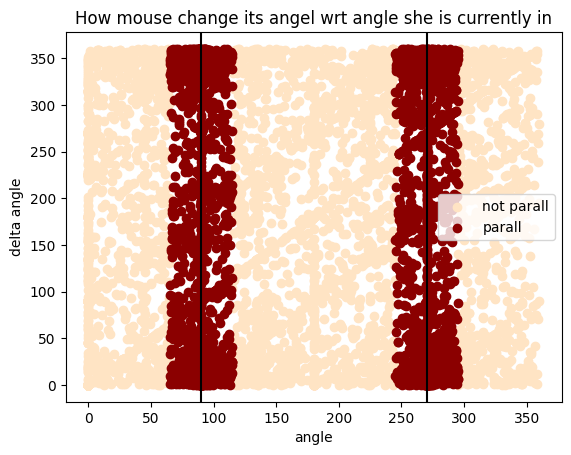

In [48]:
par13 = []
reg13 = []
l = 600 # 233
for k, df in DfsStep13.items():
    mask = ((df['angles']>=65) & (df['angles']<=115)) \
                               | ((df['angles']>=245) & (df['angles']<=295))
    parallel_df = df.loc[mask]
    not_parallel_df = df[~mask]

    print(k, len(parallel_df[:l]), len(not_parallel_df[:l]))
    par13.append(parallel_df[:l]) 
    reg13.append(not_parallel_df[:l])
    
dfPar13 = pd.concat(par13)
dfReg13 = pd.concat(reg13)

plt.scatter(dfReg13['angles'], dfReg13['delta_angle'], color='bisque', label='not parall')
plt.scatter(dfPar13['angles'], dfPar13['delta_angle'], color='darkred', label='parall')
plt.axvline(90, c='black')
plt.axvline(270, c='black')
plt.legend()
plt.title('How mouse change its angel wrt angle she is currently in')
plt.xlabel('angle')
plt.ylabel('delta angle')
plt.show()

tr11 600 600
tr12 478 418
tr2 600 600
tr3 391 373
tr4 124 53
tr5 457 247
tr6 600 600
tr7 382 367
tr91 600 600
tr92 600 600


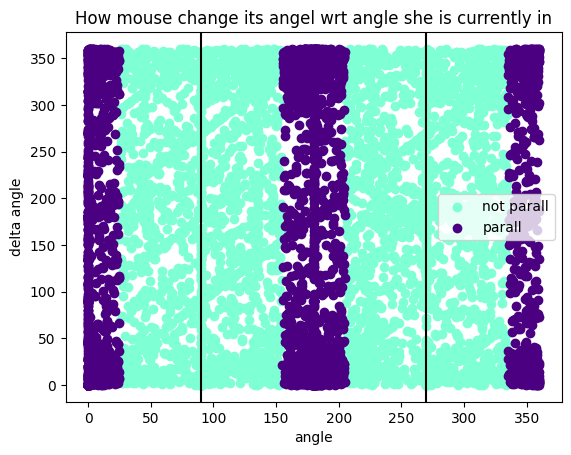

In [49]:
par24 = []
reg24 = []
l = 600 #233
for k, df in DfsStep24.items():
    mask = ((df['angles']>=335) | (df['angles']<=25)) \
                               | ((df['angles']>=155) & (df['angles']<=205))
    parallel_df = df.loc[mask]
    not_parallel_df = df[~mask]

    print(k, len(parallel_df[:l]), len(not_parallel_df[:l]))
    par24.append(parallel_df[:l]) 
    reg24.append(not_parallel_df[:l])
    
dfPar24 = pd.concat(par24)
dfReg24 = pd.concat(reg24)

plt.scatter(dfReg24['angles'], dfReg24['delta_angle'], color='aquamarine', label='not parall')
plt.scatter(dfPar24['angles'], dfPar24['delta_angle'], color='indigo', label='parall')
plt.axvline(90, c='black')
plt.axvline(270, c='black')
plt.legend()
plt.title('How mouse change its angel wrt angle she is currently in')
plt.xlabel('angle')
plt.ylabel('delta angle')
plt.show()

### мы тут смотрим общие (для всех мышей) распределения изменения углов в зонах рядом со стенами (в зонах 1 и 3; 2 и 4) отдельно для углов +- параллельных стене и нет. сравниваем распределения

Bin size is 5.999780704406205 (degrees)


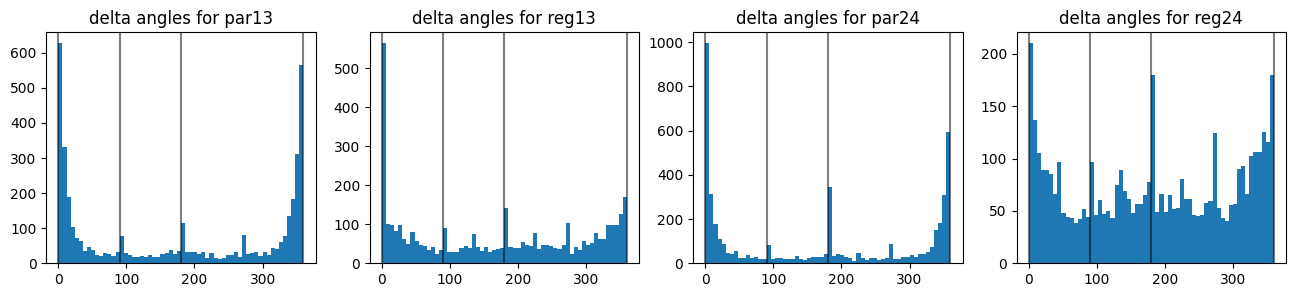

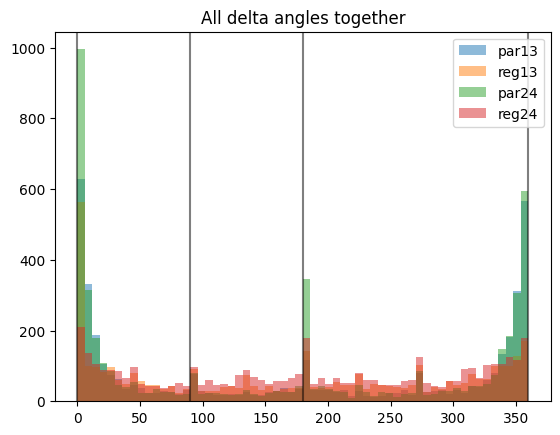

In [50]:
bins = 60
wall_hist = {}
fig, axes = plt.subplots(1, 4, figsize=(16, 3))
names = ['par13', 'reg13', 'par24', 'reg24']
for i, dat in enumerate([dfPar13, dfReg13, dfPar24, dfReg24]):
    freqs, binEdges, _ = axes[i].hist(dat['delta_angle'], bins=bins)
    if i ==0:
        print(f'Bin size is {binEdges[1] - binEdges[0]} (degrees)')
    for ang in [0, 90, 180, 360]:
        axes[i].axvline(ang, c='black', alpha=0.5)
    axes[i].set_title(f'delta angles for {names[i]}')

    bin_mid = 0.5 * (binEdges[1:] + binEdges[:-1])
    wall_hist[names[i]] = [bin_mid, freqs]
plt.show()

# all together
for i, dat in enumerate([dfPar13, dfReg13, dfPar24, dfReg24]):
    plt.hist(dat['delta_angle'], label=names[i], alpha=0.5, bins=bins)
for ang in [0, 90, 180, 360]:
    plt.axvline(ang, c='black', alpha=0.5)
plt.title('All delta angles together')
plt.legend()
plt.show()

In [35]:
# Save distributions
import pickle
with open(f'angWallsDistr_nbins_{bins}.pkl', 'wb') as fp:
    pickle.dump(wall_hist, fp)

### all_hist словарь с гистограммами распределений изменения углов для каждой зоны для каждой мыши

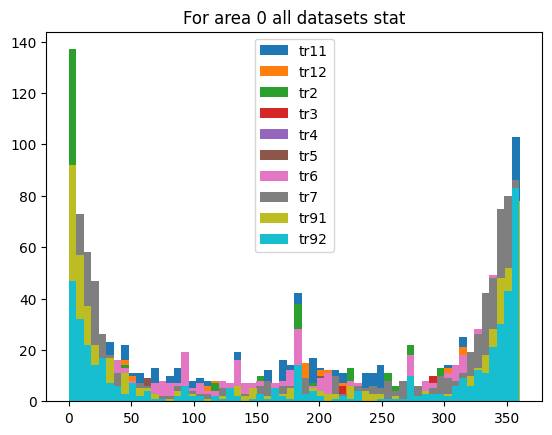

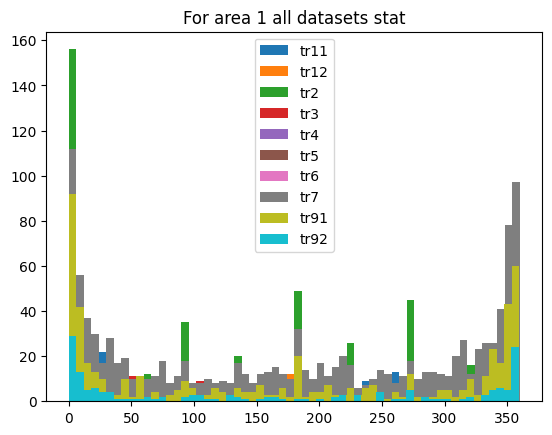

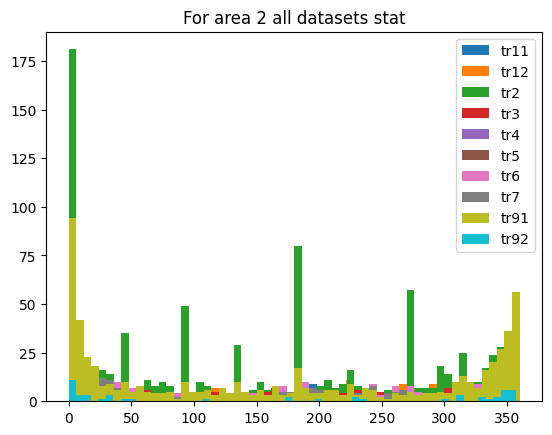

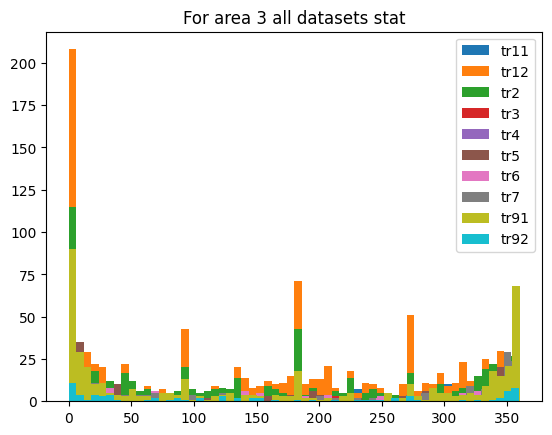

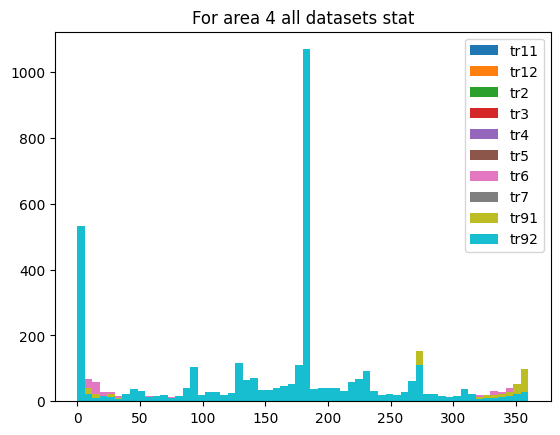

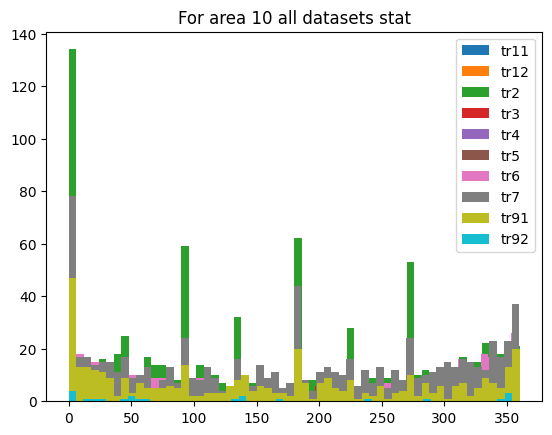

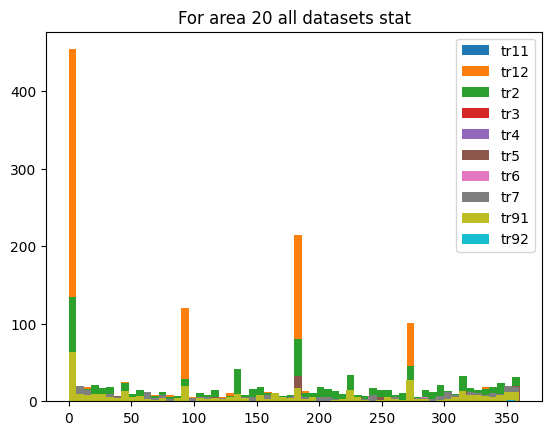

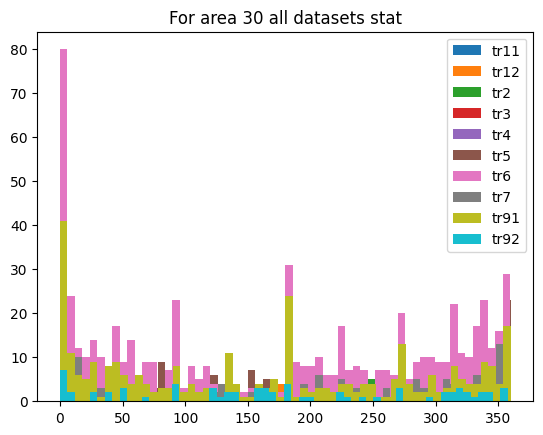

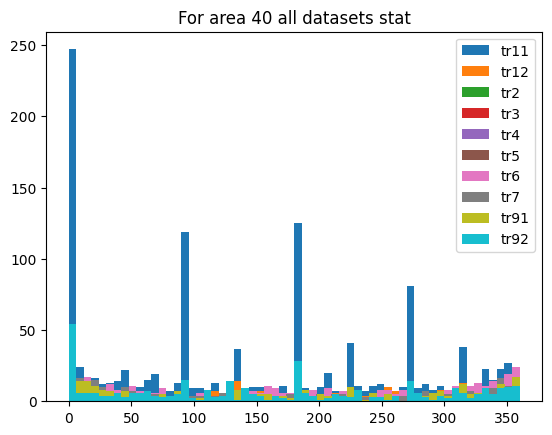

In [51]:
bins = 60
all_hist = {}

for area in [0, 1, 2, 3, 4, 10, 20, 30, 40]:
    all_hist[area] = {}

    for k, df in dfs_with_step_lens.items():
        df_area = df.loc[df['near_wall'] == area]
        freqs, binEdges, _ = plt.hist(df_area['delta_angle'], bins=bins, label=k)
        if k == 'tr1' and area==0:
            print(f'Bin size is {binEdges[1] - binEdges[0]} (degrees)')
        bin_mid = 0.5 * (binEdges[1:] + binEdges[:-1])

        all_hist[area][k] = [bin_mid, freqs]
    plt.title(f'For area {area} all datasets stat')
    plt.legend()
    plt.show()

### возьмем от каждой мыши (в каждой зоне) одинаковое количество точек. но от некоторых мышей выйдет чуть меньше точек, чем от большинства. создадим словари с полученными обрезанными таблицами dict0, dict1 и тд

In [52]:
for k, df in dfs_with_step_lens.items():
    for area in [0, 1, 2, 3, 4, 10, 20, 30, 40]:
        print(f'For {k} in {area} area: len={len(df.loc[df["near_wall"] == area])}')

For tr11 in 0 area: len=1184
For tr11 in 1 area: len=894
For tr11 in 2 area: len=441
For tr11 in 3 area: len=400
For tr11 in 4 area: len=879
For tr11 in 10 area: len=335
For tr11 in 20 area: len=201
For tr11 in 30 area: len=191
For tr11 in 40 area: len=1293
For tr12 in 0 area: len=904
For tr12 in 1 area: len=681
For tr12 in 2 area: len=424
For tr12 in 3 area: len=1086
For tr12 in 4 area: len=472
For tr12 in 10 area: len=189
For tr12 in 20 area: len=1407
For tr12 in 30 area: len=234
For tr12 in 40 area: len=417
For tr2 in 0 area: len=725
For tr2 in 1 area: len=814
For tr2 in 2 area: len=1028
For tr2 in 3 area: len=703
For tr2 in 4 area: len=194
For tr2 in 10 area: len=942
For tr2 in 20 area: len=1078
For tr2 in 30 area: len=201
For tr2 in 40 area: len=103
For tr3 in 0 area: len=460
For tr3 in 1 area: len=450
For tr3 in 2 area: len=394
For tr3 in 3 area: len=124
For tr3 in 4 area: len=370
For tr3 in 10 area: len=120
For tr3 in 20 area: len=50
For tr3 in 30 area: len=85
For tr3 in 40 area

In [53]:
def cut_into_dict(dfs_dict, area, max_len):
    cutted_df_dict = {}
    for k, df in dfs_dict.items():
        # print(k + ' ' + str(area))  # tmp
        cutted_df = df.loc[df['near_wall'] == area]
        # print(len(cutted_df))  # tmp
        cutted_df = cutted_df.iloc[:max_len]
        # print(len(cutted_df))  # tmp
        cutted_df_dict[k] = cutted_df

    return cutted_df_dict

In [54]:
walls = [10, 20, 30, 40]
max_len = 90  # others were 108, 107, 102
near_corners_dict = {}
for w in walls:
    near_corners_dict[w] = cut_into_dict(dfs_with_step_lens, w, max_len)

In [55]:
walls = [0, 1, 2, 3, 4]  # TODO different max_len ???
max_len = 200  # others were 281, 202, 164, 209
near_wall_center_dict = {}
for w in walls:
    near_wall_center_dict[w] = cut_into_dict(dfs_with_step_lens, w, max_len)

In [56]:
# with the same max_len  # TODO выше такой же код уже был, разве нет?
walls = [0, 1, 2, 3, 4, 10, 20, 30, 40] 
max_len = 200 
sorted_by_area_datasets = {}
for w in walls:
    sorted_by_area_datasets[w] = cut_into_dict(dfs_with_step_lens, w, max_len)

##### делаем df для каждой зоны - берем значения от всех мышей (примерно одинаокове количество значений от каждой мыши)

In [57]:
def merge_df(df_dict):
    delta_ang_list = []
    for k, df in df_dict.items():
        delta_ang_list.append(df['delta_angle'])
        
    dfN = pd.concat(delta_ang_list)
    dfN = dfN.reset_index()
    dfN = dfN.drop(['index'], axis=1)
    return dfN

In [58]:
delta_angles_all_mice = {}   # sorted by areas
for area, df in sorted_by_area_datasets.items():
    delta_ang_df = merge_df(df)
    print(f'For area {area} df len={len(delta_ang_df)}')
    delta_angles_all_mice[area] = delta_ang_df

For area 0 df len=2000
For area 1 df len=1896
For area 2 df len=1772
For area 3 df len=1639
For area 4 df len=1850
For area 10 df len=1523
For area 20 df len=1530
For area 30 df len=1561
For area 40 df len=1680


### теперь сделаны df по которым и надо построить итоговые усредненные гистограммы

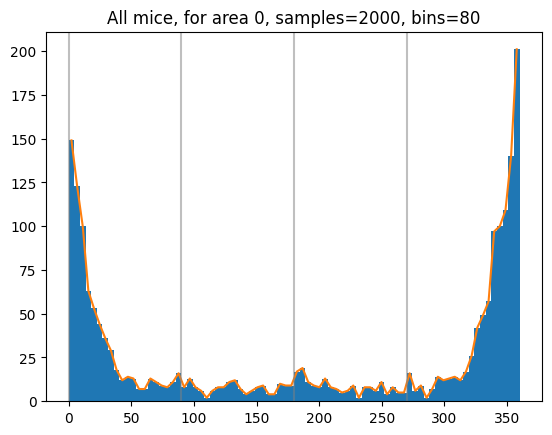

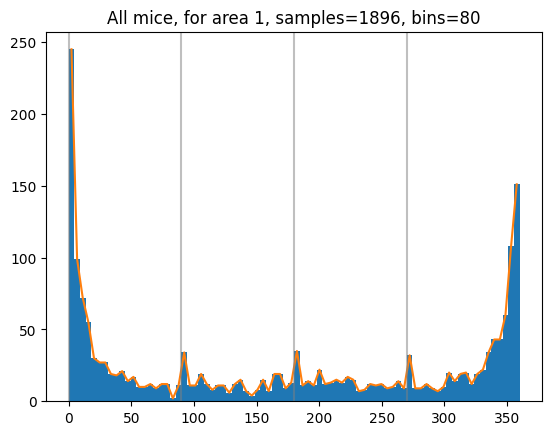

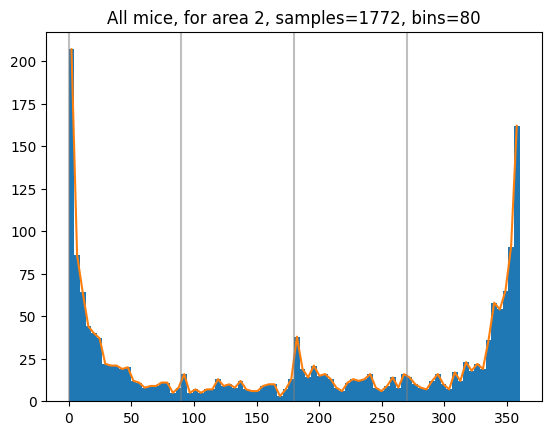

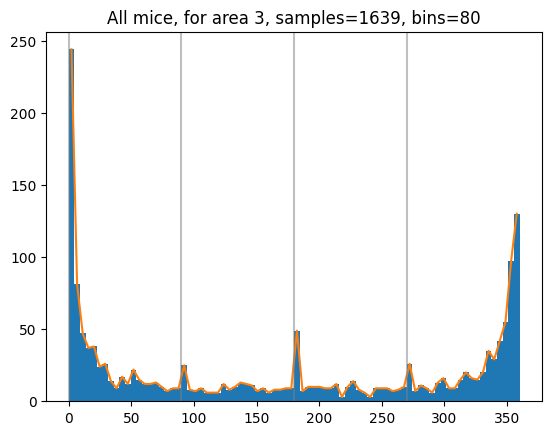

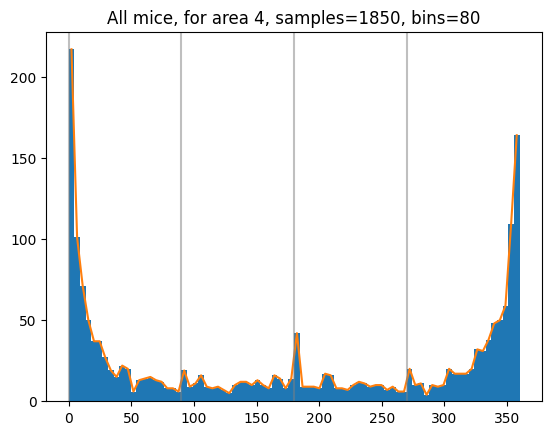

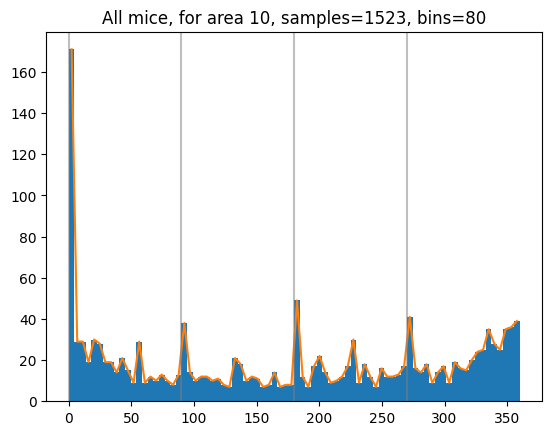

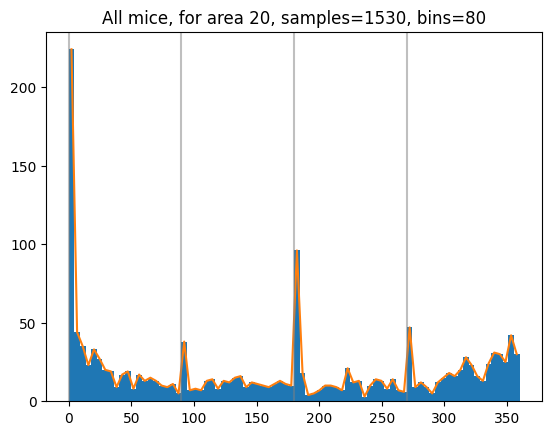

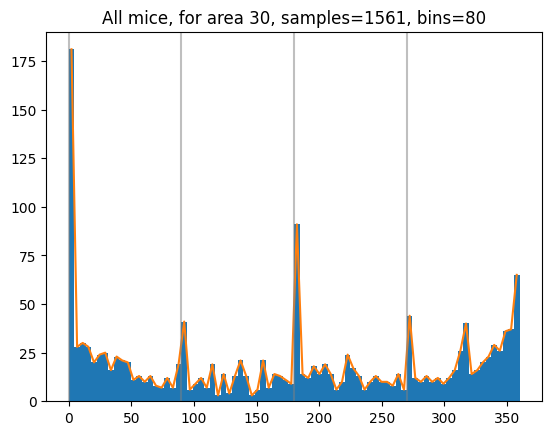

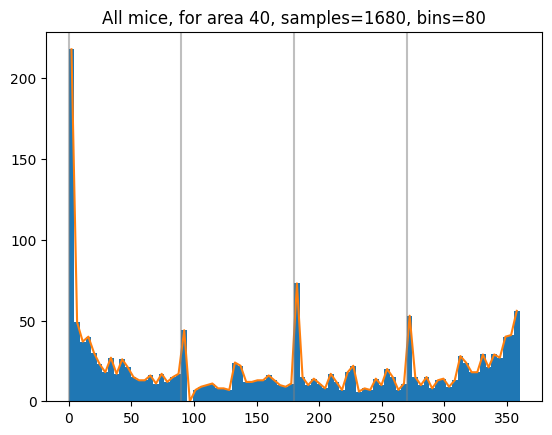

In [59]:
delta_ang_hist = {}
bins = 80

for k, df in delta_angles_all_mice.items():
    freqs, binEdges, _ = plt.hist(df, bins=bins)
    bin_mid = 0.5 * (binEdges[1:] + binEdges[:-1])
    delta_ang_hist[k]  = [bin_mid, freqs]

    plt.plot(bin_mid, freqs)
    for ang in [0, 90, 180, 270]:
        plt.axvline(ang, c='grey', alpha=0.5)
    plt.title(f'All mice, for area {k}, samples={len(df)}, bins={bins}')
    plt.show()

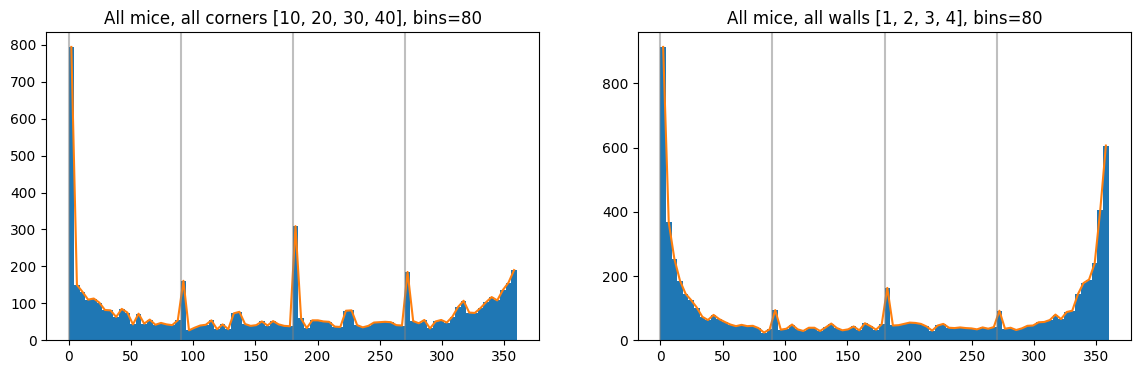

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
# All corners together
all_corn_list = [delta_angles_all_mice[k] for k in [10, 20, 30, 40]]
all_corn_df = pd.concat(all_corn_list)

freqs, binEdges, _ = axes[0].hist(all_corn_df, bins=bins)
bin_mid = 0.5 * (binEdges[1:] + binEdges[:-1])
delta_ang_hist['all_corners']  = [bin_mid, freqs]

axes[0].plot(bin_mid, freqs)
axes[0].set_title(f'All mice, all corners [10, 20, 30, 40], bins={bins}')

# All walls together
all_walls_list = [delta_angles_all_mice[k] for k in [1, 2, 3, 4]]
all_walls_df = pd.concat(all_walls_list)

freqs, binEdges, _ = axes[1].hist(all_walls_df, bins=bins)
bin_mid = 0.5 * (binEdges[1:] + binEdges[:-1])
delta_ang_hist['all_walls']  = [bin_mid, freqs]

axes[1].plot(bin_mid, freqs)
axes[1].set_title(f'All mice, all walls [1, 2, 3, 4], bins={bins}')
for ax_idx in [0, 1]:
    for ang in [0, 90, 180, 270]:
        axes[ax_idx].axvline(ang, c='grey', alpha=0.5)
plt.show()

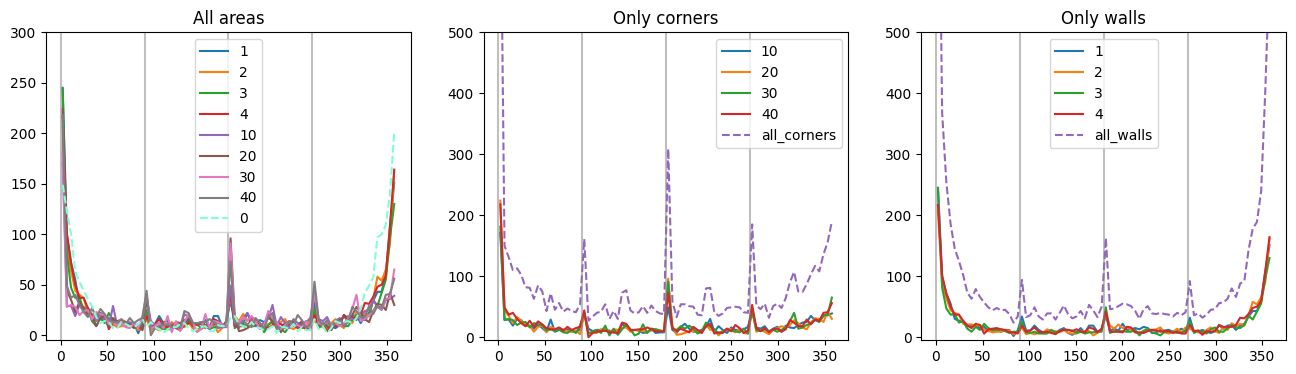

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# 1. All areas
for k, df in delta_ang_hist.items():
    if k not in [0, 'all_corners', 'all_walls']:
        bin_mid, freqs = df
        axes[0].plot(bin_mid, freqs, label=k)

bin_mid, freqs = delta_ang_hist[0]
axes[0].plot(bin_mid, freqs, linestyle='--', label=0, c='aquamarine')
axes[0].set_ylim([-5, 300])
axes[0].set_title('All areas')

# 2. Only corners
for k, df in delta_ang_hist.items():
    if k in [10, 20, 30, 40]:
        bin_mid, freqs = df
        axes[1].plot(bin_mid, freqs, label=k)

bin_mid, freqs = delta_ang_hist['all_corners']
axes[1].plot(bin_mid, freqs, linestyle='--', label='all_corners')
axes[1].set_title('Only corners')
axes[1].set_ylim([-5, 500])

# 3. Only walls
for k, df in delta_ang_hist.items():
    if k in [1, 2, 3, 4]:
        bin_mid, freqs = df
        axes[2].plot(bin_mid, freqs, label=k)

bin_mid, freqs = delta_ang_hist['all_walls']
axes[2].plot(bin_mid, freqs, linestyle='--', label='all_walls')
axes[2].set_title('Only walls')
axes[2].set_ylim([-5, 500])

for ax_idx in [0, 1, 2]:
    axes[ax_idx].legend()
    for ang in [0, 90, 180, 270]:
        axes[ax_idx].axvline(ang, c='grey', alpha=0.5)
plt.show()

##### надо нормализовать от 0 до 1 все эти графики

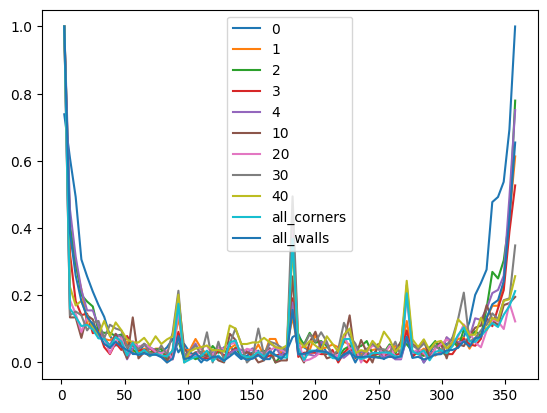

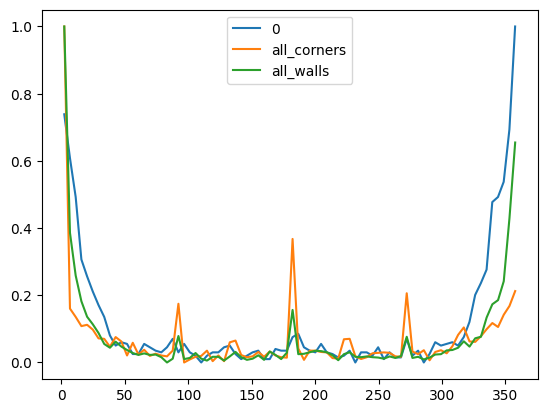

In [62]:
def min_max_normalize(y):
    yn = (y - y.min()) / (y.max() - y.min())
    return yn

for k, df in delta_ang_hist.items():
    df[1] = min_max_normalize(df[1])
    plt.plot(df[0], df[1], label=k)
plt.legend()
plt.show()

for k, df in delta_ang_hist.items():
    if k in [0, 'all_corners', 'all_walls']:
        df[1] = min_max_normalize(df[1])
        plt.plot(df[0], df[1], label=k)
plt.legend()
plt.show()

In [ ]:
### ==============================================
### STOPPED HERE
### ==============================================
### ==============================================
### ==============================================

##### можно сохранить уусредненные распределения по центру, зоне у стен и зоне углов в словарь origDistr

In [ ]:
# origDistr = {}
# for i in ['0', 'corn', 'wall']:
#     origDistr[i] = mergPlots[i]

# TODO: why??
# import pickle
# with open('angOrigDistr.pkl', 'wb') as fp:
#     pickle.dump(origDistr, fp)

#### можно сгладить распределения по гаусу

In [ ]:
# TODO: smoothing function

def smooth_angle_hist():
    pass

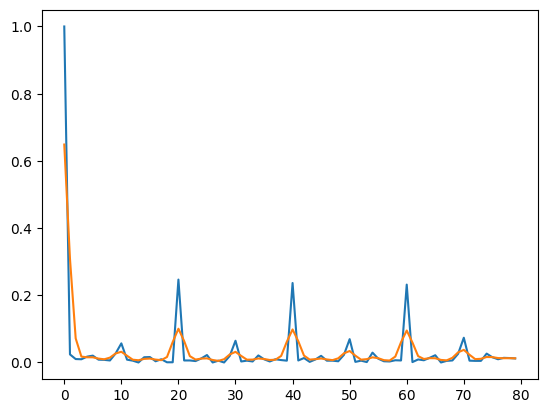

In [147]:
x = delta_ang_hist['all_corners'][1]
y3 = gaussian_filter1d(x, 1)
plt.plot(x)
plt.plot(y3)

### можно сгладить распределения с кернел денсити

from scipy.stats import norm
from sklearn.neighbors import KernelDensity

#X = mergPlots['0'][1]
X = mergDfs['0'].to_numpy()
x = mergDfs['0'].to_numpy()
X

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\2467016934.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  k = sns.distplot(mergDfs[i]['delta_angle'], hist=True, kde=True, bins=int(180/5), color = 'magenta',  hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})


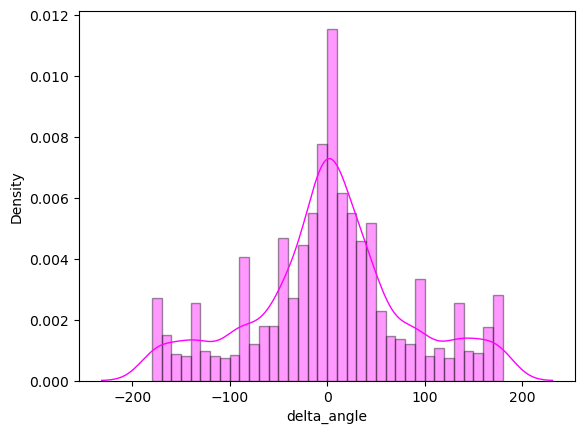

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\2467016934.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  k = sns.distplot(mergDfs[i]['delta_angle'], hist=True, kde=True, bins=int(180/5), color = 'magenta',  hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})


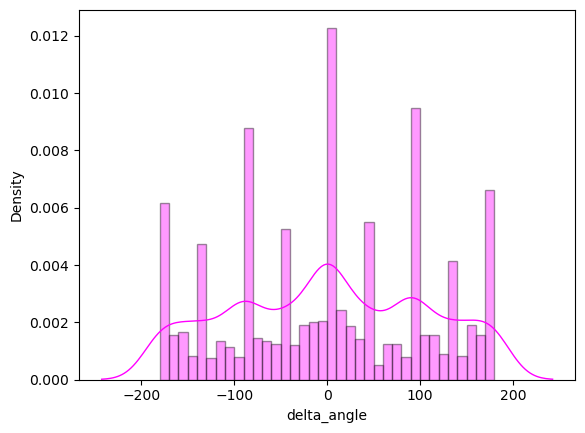

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\2467016934.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  k = sns.distplot(mergDfs[i]['delta_angle'], hist=True, kde=True, bins=int(180/5), color = 'magenta',  hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})


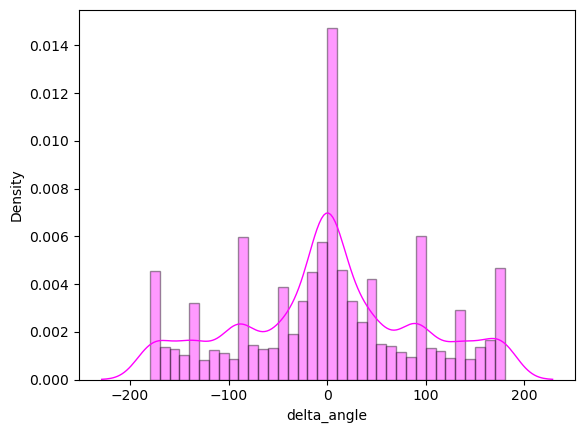

In [ ]:
finalDistr = {}
for i in ['0', 'corn', 'wall']:
    k = sns.distplot(mergDfs[i]['delta_angle'], hist=True, kde=True, bins=int(180/5),
                      color = 'magenta',  hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
    plt.show()
    j = k.lines
    x = j[0]._xorig
    y = j[0]._yorig
    y = minMaxOfY(y)
    finalDistr[i] = [x, y]
    

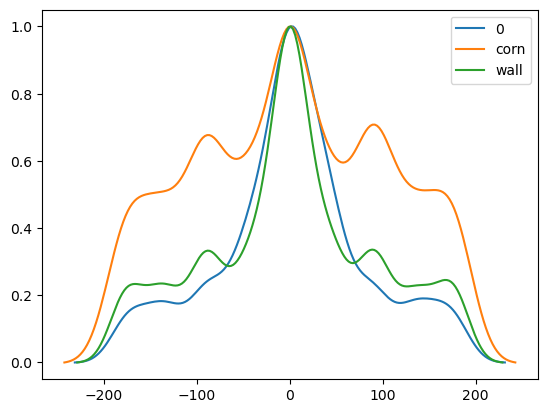

In [ ]:
for i in finalDistr:
    plt.plot(finalDistr[i][0], finalDistr[i][1], label = i)
plt.legend()

In [ ]:
import pickle
with open('angleDistr.pkl', 'wb') as fp:
    pickle.dump(finalDistr, fp)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4250383979.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  k = sns.distplot(mergDfs[i]['delta_angle'], hist=True, kde=True, bins=int(180/5), color = 'magenta',  hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})


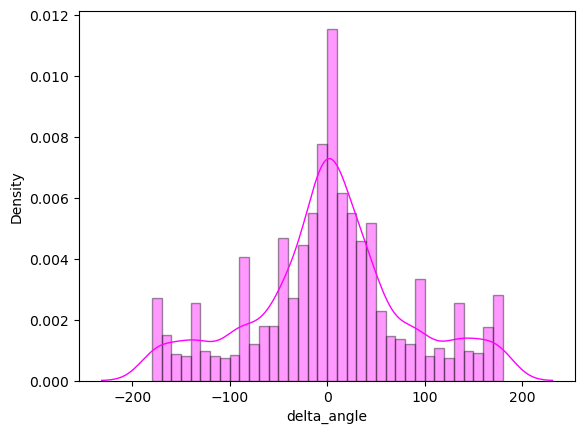

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4250383979.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  k = sns.distplot(mergDfs[i]['delta_angle'], hist=True, kde=True, bins=int(180/5), color = 'magenta',  hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})


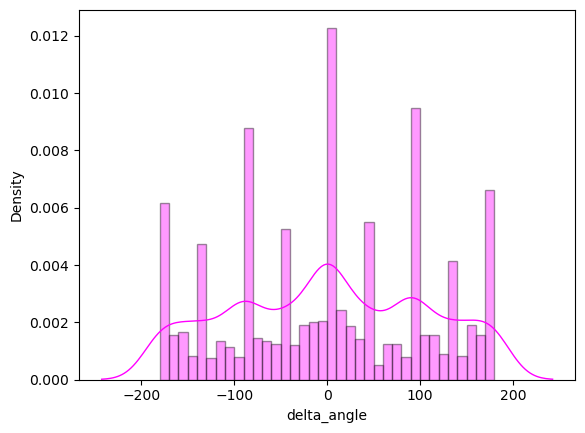

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4250383979.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  k = sns.distplot(mergDfs[i]['delta_angle'], hist=True, kde=True, bins=int(180/5), color = 'magenta',  hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})


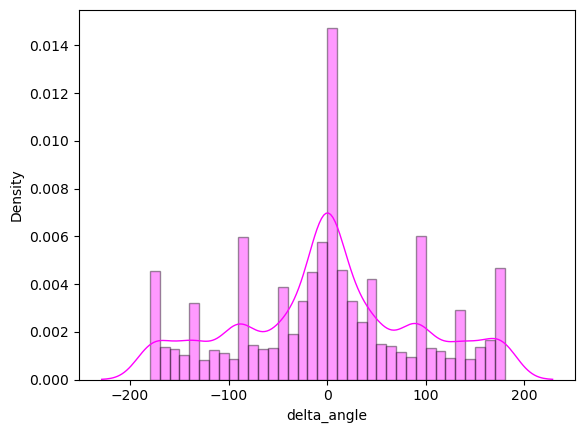

In [ ]:
finalDistr = {}
for i in ['0', 'corn', 'wall']:
    k = sns.distplot(mergDfs[i]['delta_angle'], hist=True, kde=True, bins=int(180/5), color = 'magenta',  hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
    plt.show()
    j = k.lines
    x = j[0]._xorig
    y = j[0]._yorig
    y = minMaxOfY(y)
    finalDistr[i] = [x, y]

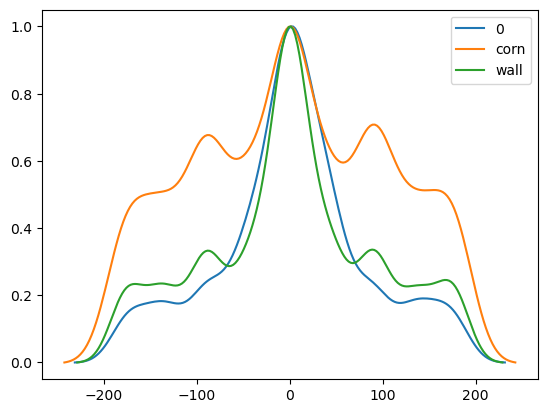

In [ ]:
for i in finalDistr:
    plt.plot(finalDistr[i][0], finalDistr[i][1], label = i)
plt.legend()